# Text Clustering with LLMs

In this exaple it will be explored the procedure to perform text clustering using LLM embeddings for the dataset of professor's research publications. The process begins with importing the data, then it will generate embeddings with a Sentence-BERT model for the abstracts. Finally, those embeddings will be implemented to test and experiment with clustering algorithms.

## Data and Libraries

Import the clustering_module with the functions needed for this example. Then import the 'publication_data.pkl' file, which corresponds the a cleaned version of the research papers dataset.

In [3]:
# Import text clustering module in the repository
from clustering_module import *

# Import dataset
df = pd.read_pickle('../../data/publication_data.pkl')
df.head()

,Professor,Publication Year,Authors,Abstract,cde-small-v1,keywords,keyword_embeddings
0,Abbas Firoozabadi,2024,Ding B.; Kantzas A.; Firoozabadi A.,CO2 storage in saline aquifers may contribute ...,"[-0.03482602909207344, 0.07707592099905014, -0...","CO2 storage, CO2 viscosification, In-situ inje...","[0.014354678, -0.08335122, 0.024348117, 0.0376..."
1,Abbas Firoozabadi,2024,Chávez-Miyauchi T.E.; Kar T.; Ayirala S.; Yous...,Flooding with low salinity water (LSW) may inc...,"[-0.056211572140455246, 0.08944161981344223, -...","interfacial viscoelasticity, oil recovery, oil...","[-0.027700275, -0.1339855, -0.00033577834, -0...."
2,Abbas Firoozabadi,2024,Kobayashi K.; Firoozabadi A.,Quartz is ubiquitous in subsurface formations....,"[-0.04039822518825531, 0.09106086194515228, 0....","(0001) and (101̅0)-β surfaces, ion adsorption","[0.028433805, -0.05142428, -0.005824922, -0.00..."
3,Abbas Firoozabadi,2024,Jex M.; Mikyška J.; Firoozabadi A.,Successful large-scale compositional reservoir...,"[-0.012029152363538742, 0.12037479132413864, -...","multiphase-split computations, phase-split, st...","[-0.031956628, 0.01409879, -0.028502911, 0.024..."
4,Abbas Firoozabadi,2024,Feng Y.; Firoozabadi A.,The wrong Supplementary file was originally pu...,"[-0.02208702825009823, 0.06307578831911087, -0...","Springer Nature, Supplementary file, Springer...","[0.031355694, -0.11014276, -0.0006087139, -0.0..."


## Embeddings

Generate text embeddings for each abstract in the dataset using Sentence-BERT model

In [6]:
# Compute embeddings -> Activate GPU for faster computing
# Note: Use GPU for faster computation.
df = compute_sbert_embeddings(df, text_column='Abstract')

## Clustering

The models selected with best clustering results were Agglomerative Hierarchical clustering (AHC) and Spectral Clustering.

### Number of clusters

To validate the number of clusters it is implemented the Silhouette score and the Calinski-Harabasz score as an source for an informed decision. However, the clustering methods in this project are unsupervised, so most of the decisions were weighted upon empirical results.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# of Clusters: 2, silhouette score: 0.04595262302227945, CH score: 887.9039880136377
# of Clusters: 3, silhouette score: 0.036124518315306595, CH score: 702.0502495788362
# of Clusters: 4, silhouette score: 0.029928677576567416, CH score: 597.5678242537506
# of Clusters: 5, silhouette score: 0.02966421365851993, CH score: 527.9074106313846
# of Clusters: 6, silhouette score: 0.028382030401659226, CH score: 479.2382898282747
# of Clusters: 7, silhouette score: 0.02915387608902928, CH score: 442.3783762561675
# of Clusters: 8, silhouette score: 0.02959669149872085, CH score: 412.89318744871156
# of Clusters: 9, silhouette score: 0.03105402950162993, CH score: 384.62472480060995
# of Clusters: 10, silhouette score: 0.03220696692527282, CH score: 362.6296974313791
# of Clusters: 11, silhouette score: 0.030493392547785894, CH score: 344.0683197321622
# of Clusters: 12, silhouette score: 0.02970293435596123, CH score: 328.77327936405413
# of Clusters: 13, silhouette score: 0.0296936418336286

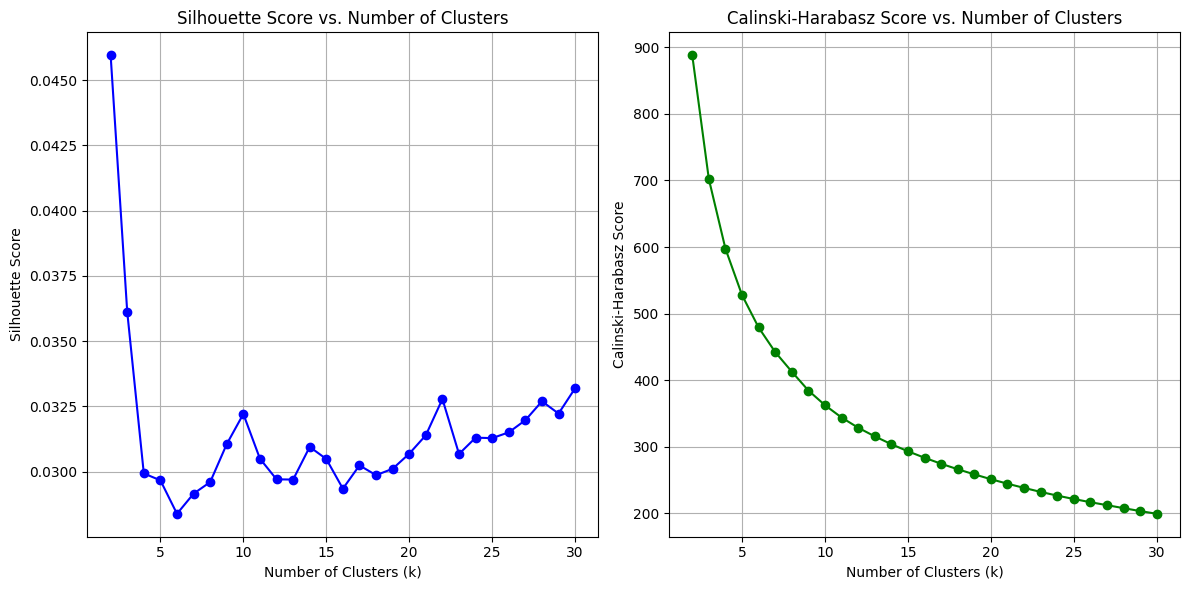

In [ ]:
# Evaluate clustering
# (this can take a while to run)
embeddings = df['SBERT_embeddings'].tolist()
evaluate_agglomerative_clustering(embeddings, k_range=range(2,31))

Here it is shown the evaluation for the AHC method. The evaluation with spectral clustering method takes considerably longer to run, but it can be performed by uncommenting the cell below.

In [ ]:
#evaluate_spectral_clustering(embeddings, k_range=range(2,31))

### 3-Level hierarchical clustering organization

In this section we implement a 3-level clustering organization by iteratively making subclusters within clusters.

In [7]:
# Perform 3-level agglomerative clustering
df = three_level_agglomerative_clustering(df, embeddings_column='SBERT_embeddings', n_clusters1=12, n_clusters2=6, n_clusters3=3, save_path='abstracts_cluster_labels_ahc.pkl')

# Visualizations

### Visualize clusters

The clusters can be represented in a 2D plot by implementing t-SNE dimensionality reduction.

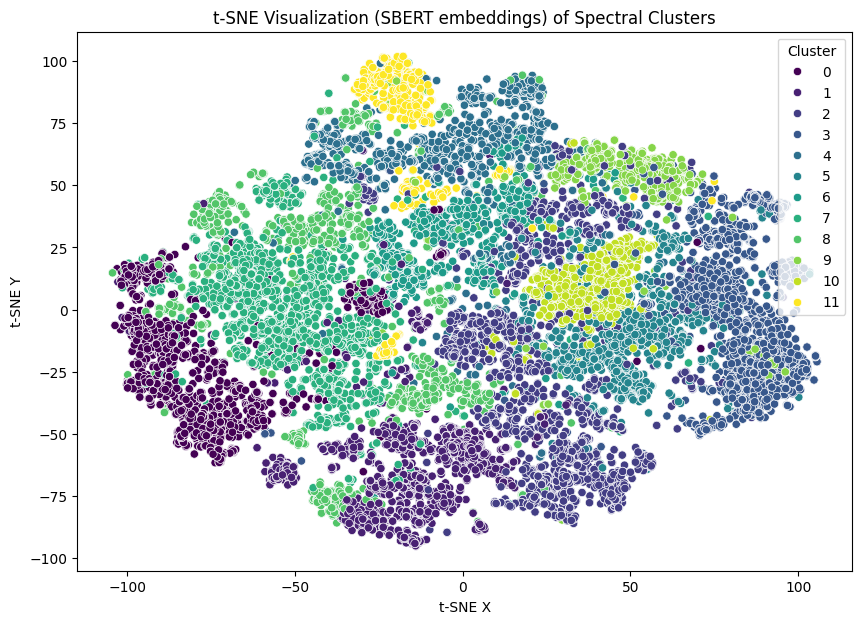

In [23]:
# Visualize clusters with t-SNE
embeddings = np.array(df['SBERT_embeddings'].tolist())
X_tsne = fit_tsne(embeddings)

# Plot the results
plot_dimensionality_reduction(X_tsne, df)


## Cluster Keywords

TF-IDF is implemented to the abstracts gathered in each cluster to extract the main keywords that characterize the group.

In [8]:
# Assign keywords
df = assign_keywords_to_clusters(df, text_column='Abstract', save_path='abstracts_cluster_labels_ahc_with_keywords.pkl')

In [24]:
print_top_keywords_per_level1(df)


Top 10 Keywords per Level-1 Cluster:

Cluster 2: water, oil, surface, phase, materials, properties, gas, foam, temperature, chemical
Cluster 1: time, bridge, data, flow, response, methods, seismic, numerical, control, nonlinear
Cluster 8: data, systems, patients, time, water, models, risk, health, paper, network
Cluster 3: films, materials, field, temperature, 2d, ferroelectric, phase, magnetic, properties, optical
Cluster 5: graphene, materials, carbon, surface, energy, chemical, properties, bn, 2d, metal
Cluster 10: nanotubes, carbon, nanotube, cnt, single, properties, swnts, cnts, walled, aligned
Cluster 6: cell, cells, tissue, devices, haptic, neural, mechanical, device, control, networks
Cluster 7: data, time, algorithm, learning, problem, models, methods, image, graph, network
Cluster 0: performance, network, data, time, channel, systems, algorithm, paper, memory, power
Cluster 4: cells, cell, gene, cancer, protein, data, expression, dna, tumor, methods
Cluster 9: optical, plasm

## Hierarchical Graph visualizations

Based on the 3-level clustering structure, the graph visualizations can be generated using plotly. The output will be a grid of graphs representing clusters (nodes) and their hierarchical relationships (edges). The graphs include node descriptions which show the main keywords of the abstracts gathered in each cluster, and the name of professors who appear in the cluster along with the number of times one of their papers appear in the group. The output interactive plot is an 'html' file.

In [10]:
# Visualize hierarchy
fig = visualize_three_level_clusters(df, save_path='3_level_hierarchical_clustering_subfigures_ahc.html')
fig

In [11]:
df

,Professor,Publication Year,Authors,Abstract,cde-small-v1,keywords,keyword_embeddings,SBERT_embeddings,Level_1,Level_2,Level_3,Level_1_keywords,Level_2_keywords,Level_3_keywords
0,Abbas Firoozabadi,2024,Ding B.; Kantzas A.; Firoozabadi A.,CO2 storage in saline aquifers may contribute ...,"[-0.03482602909207344, 0.07707592099905014, -0...","CO2 storage, CO2 viscosification, In-situ inje...","[0.014354678, -0.08335122, 0.024348117, 0.0376...","[-0.02289007045328617, -0.08504495769739151, 0...",2,2,0,"water, oil, surface, phase, materials, propert...","oil, foam, water, gas, co2, surfactant, asphal...","asphaltene, oil, gas, water, co2, relaxation, ..."
1,Abbas Firoozabadi,2024,Chávez-Miyauchi T.E.; Kar T.; Ayirala S.; Yous...,Flooding with low salinity water (LSW) may inc...,"[-0.056211572140455246, 0.08944161981344223, -...","interfacial viscoelasticity, oil recovery, oil...","[-0.027700275, -0.1339855, -0.00033577834, -0....","[-0.08787292242050171, -0.0915621668100357, 0....",2,2,1,"water, oil, surface, phase, materials, propert...","oil, foam, water, gas, co2, surfactant, asphal...","oil, surfactant, scale, water, adsorption, sur..."
2,Abbas Firoozabadi,2024,Kobayashi K.; Firoozabadi A.,Quartz is ubiquitous in subsurface formations....,"[-0.04039822518825531, 0.09106086194515228, 0....","(0001) and (101̅0)-β surfaces, ion adsorption","[0.028433805, -0.05142428, -0.005824922, -0.00...","[-0.036737680435180664, -0.014096573926508427,...",2,2,1,"water, oil, surface, phase, materials, propert...","oil, foam, water, gas, co2, surfactant, asphal...","oil, surfactant, scale, water, adsorption, sur..."
3,Abbas Firoozabadi,2024,Jex M.; Mikyška J.; Firoozabadi A.,Successful large-scale compositional reservoir...,"[-0.012029152363538742, 0.12037479132413864, -...","multiphase-split computations, phase-split, st...","[-0.031956628, 0.01409879, -0.028502911, 0.024...","[-0.07090893387794495, -0.016155632212758064, ...",1,0,0,"time, bridge, data, flow, response, methods, s...","control, systems, response, linear, nonlinear,...","systems, reduction, data, problem, linear, con..."
4,Abbas Firoozabadi,2024,Feng Y.; Firoozabadi A.,The wrong Supplementary file was originally pu...,"[-0.02208702825009823, 0.06307578831911087, -0...","Springer Nature, Supplementary file, Springer...","[0.031355694, -0.11014276, -0.0006087139, -0.0...","[-0.08218134939670563, 0.03878998011350632, 0....",8,0,0,"data, systems, patients, time, water, models, ...","students, data, learning, systems, engineering...","engineering, author, team, data, systems, stud..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19913,Z. Maria Oden,1998,ZM Oden and DM Selvitelli,The local interpretation of microfinite elemen...,"[-0.017024239525198936, 0.03420193865895271, -...","bone structure, microfinite element, microcomp...","[0.032416493, -0.066631064, -0.039351583, 0.02...","[-0.05343210697174072, -0.04591607674956322, 0...",6,4,0,"cell, cells, tissue, devices, haptic, neural, ...","contact, knee, muscle, bone, forces, gait, joi...","bone, pelvic, hip, implant, stress, models, fe..."
19914,Z. Maria Oden,1997,Z Maria Oden and David M Selvitelli,Maintaining structural integrity is an importa...,"[0.020611802116036415, 0.05117771402001381, 0....","FC-BGA, FC-BFA, FibG sensors, Pb","[0.0037058915, -0.095112205, -0.012660007, 0.0...","[-0.03550101816654205, -0.028953803703188896, ...",1,1,0,"time, bridge, data, flow, response, methods, s...","response, damage, nonlinear, structural, contr...","damage, contact, nonlinear, structural, data, ..."
19915,Z. Maria Oden,1993,ZM Oden and RT Hart,A comprehensive extension of the ordinary 2-Hi...,"[-0.035012513399124146, 0.06413790583610535, -...","2-Higgs Doublet Model, 2HDM, LHC, ES,","[-0.015863387, -0.04535007, 0.0025909084, -0.0...","[-0.14661502838134766, -0.006519358605146408, ...",7,5,1,"data, time, algorithm, learning, problem, mode...","data, models, selection, methods, bayesian, an...","data, feature, selection, class